In [2]:

import yfinance as yf
import pandas as pd
import numpy as np
nifty50 = yf.download("^NSEI", start="2010-01-01", end="2024-07-01")
try:
  nifty50_constituents_df = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[1]
  nifty50_constituents = nifty50_constituents_df['Symbol'].tolist()
  nifty50_constituents = [stock + '.NS' for stock in nifty50_constituents]
except:
  print("Could not fetch Nifty 50 constituents from Wikipedia. Please manually update the list.")
  nifty50_constituents = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'HINDUNILVR.NS']

stock_data = {}
for stock in nifty50_constituents:
  try:
    stock_data[stock] = yf.download(stock, start="2010-01-01", end="2024-07-01")
  except:
    print(f"Could not download data for {stock}")

print(nifty50.head())
print(stock_data)

log_return_matrix = pd.DataFrame()

for stock, data in stock_data.items():
  data['Daily_Return'] = data['Adj Close'].pct_change()
  data['Log_Return'] = np.log1p(data['Daily_Return'])
  log_return_matrix[stock] = data['Log_Return']
nan_counts = log_return_matrix.isna().sum()
print(nan_counts)
columns_to_remove = ['SBILIFE.NS', 'HDFCLIFE.NS', 'COALINDIA.NS','BEL.NS']#the first three stocks removed because of less stock trading days and the last one because beta_init was 0
log_return_matrix = log_return_matrix.drop(columns=columns_to_remove, errors='ignore')
log_return_matrix.dropna(inplace=True)
dates_to_remove = ['2011-05-31', '2011-07-14', '2011-11-24', '2011-12-26',
               '2012-01-02', '2012-05-21', '2012-08-28', '2013-01-01',
               '2014-01-01', '2014-02-17', '2014-04-24', '2014-10-15',
               '2015-01-01', '2015-04-15', '2016-01-01', '2016-08-12',
               '2018-01-01', '2019-01-01', '2019-10-27', '2020-11-14']
log_return_matrix = log_return_matrix[~log_return_matrix.index.isin(dates_to_remove)]
print(log_return_matrix)
#cleaned matrix below
log_return_matrix_np = log_return_matrix.to_numpy()
log_return_matrix_dates = log_return_matrix.index
nifty50_dates = nifty50.index
dates_in_log_return_but_not_nifty50 = log_return_matrix_dates[~log_return_matrix_dates.isin(nifty50_dates)]
rows_to_remove = [i for i, date in enumerate(log_return_matrix_dates) if date in dates_in_log_return_but_not_nifty50]
log_return_matrix_np = np.delete(log_return_matrix_np, rows_to_remove, axis=0)
print(log_return_matrix_np)

#nifty 50 daily log retrun vector
nifty50['Daily_Return'] = nifty50['Adj Close'].pct_change()
nifty50['Log_Return'] = np.log1p(nifty50['Daily_Return'])
nifty50_log_returns_vector = nifty50['Log_Return'].values.reshape(-1, 1)
nifty50_log_returns_vector = nifty50_log_returns_vector[~np.isnan(nifty50_log_returns_vector)]
nifty50_log_returns_vector = nifty50_log_returns_vector.reshape(-1,1)
print(nifty50_log_returns_vector)


#solving for the beta initial
import cvxpy as cp
w=cp.Variable(46)
X=log_return_matrix_np
y=nifty50_log_returns_vector
y = y.reshape(-1)
objective=cp.Minimize(cp.sum_squares(X@w-y)/2)
constraints=[cp.sum(w)==1,w>=0]
problem=cp.Problem(objective,constraints)
result=problem.solve()
beta_initial=w.value
print(beta_initial)

#assigning v_j as beta_init^tau and initializing w_j bar
v=beta_initial**(-1)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195   
2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902   
2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805   
2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098   
2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000   

            Volume  
Date                
2010-01-04       0  
2010-01-05       0  
2010-01-06       0  
2010-01-07       0  
2010-01-08       0  
{'ADANIENT.NS':                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04    67.011856    69.586876    66.368103    69.219017    57.215870   
2010-01-05    69.433601    71.111961    69.433

<ipython-input-2-b04c47643301>:39: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  log_return_matrix = log_return_matrix[~log_return_matrix.index.isin(dates_to_remove)]


[0.00367118 0.00752674 0.00366936 0.01967668 0.02237186 0.01082497
 0.01185281 0.0075804  0.0099633  0.02265758 0.00345844 0.01020228
 0.0097813  0.0070014  0.01023575 0.01535078 0.1157657  0.00998354
 0.01501978 0.02891491 0.07052956 0.01140642 0.06929099 0.06223402
 0.00797085 0.04001634 0.05181738 0.0192262  0.01562021 0.00273274
 0.01711686 0.01406853 0.01039343 0.09870086 0.00090114 0.0280989
 0.01425803 0.04473206 0.00476739 0.01858103 0.00815684 0.00728244
 0.00643365 0.00140615 0.01384883 0.01490039]


In [ ]:

import pandas as pd
import numpy as np


def calculate_stats(log_returns):
  stats = {
      'mean': np.mean(log_returns),
      'median': np.median(log_returns),
      'std': np.std(log_returns),
      'min': np.min(log_returns),
      'max': np.max(log_returns),
  }
  return stats


nifty50['Daily_Return'] = nifty50['Adj Close'].pct_change()
nifty50['Log_Return'] = np.log1p(nifty50['Daily_Return'])

nifty50_stats = calculate_stats(nifty50['Log_Return'].dropna())
print("Nifty 50 Stats:")
print(nifty50_stats)

stock_stats = {}
for stock in log_return_matrix.columns:
  stock_log_returns = log_return_matrix[stock].dropna()
  stock_stats[stock] = calculate_stats(stock_log_returns)

print("\nStock Stats:")
for stock, stats in stock_stats.items():
  print(f"{stock}: {stats}")

Nifty 50 Stats:
{'mean': 0.0004288385888507779, 'median': 0.0007029866326317706, 'std': 0.010695179023719185, 'min': -0.13903756461051203, 'max': 0.08400295216282225}

Stock Stats:
ADANIENT.NS: {'mean': 0.0010675226178963465, 'median': 0.0009334258220291143, 'std': 0.03332285372526913, 'min': -0.4901942304155992, 'max': 0.2419101662368897}
ADANIPORTS.NS: {'mean': 0.0007405473652346074, 'median': 0.00025188265991602106, 'std': 0.02459926288788419, 'min': -0.237618547152578, 'max': 0.142383513901704}
APOLLOHOSP.NS: {'mean': 0.0007831564773101, 'median': -6.943669291729315e-05, 'std': 0.020687538298992673, 'min': -0.16239582698826535, 'max': 0.144052378838567}
ASIANPAINT.NS: {'mean': 0.0008196408694165918, 'median': 0.00048817075319004897, 'std': 0.0159516321153554, 'min': -0.1511478974053956, 'max': 0.08482571271635177}
AXISBANK.NS: {'mean': 0.000528936709211167, 'median': 0.0002097491810726936, 'std': 0.021852135169983484, 'min': -0.32726579098462233, 'max': 0.17798476852071635}
BAJAJ-A

Algorithm


In [3]:
import numpy as np

# Initializing problem parameters
p = 46  # Number of features
X = log_return_matrix_np  # Matrix of log returns (n x p)
y = nifty50_log_returns_vector  # Target vector (length n)

lambda_1 = 0.01
lambda_2 = 0.1
lambda_c = 1e-4
tol = 1e-5
max_iter = 10000

# Initializing weights
w = np.ones(p) / p  # Initial weights (w_0)
w_bar = w.copy()    # Copy of the initial weights for comparison

# Precomputing cj = sum(X_ij^2) for each j
cj = np.sum(X**2, axis=0)

# Computing v_j = (beta_j)^(-tau) for all j (assuming v = beta_initial**(-1))
v_hat = beta_initial**(-1)

# Initial gamma_0
gamma_0 = 115
gamma_0_prev = gamma_0  # This is storing gamma_0^{(m-1)} initially

# Iterating until convergence or max_iter is reached
for m in range(max_iter):
    w_new = np.ones(p)/p  # Updated weights for this iteration
    gamma_new =115  # Updated gamma_0

    # Step 1: Sequential update of weights w_j^(m)
    for j in range(p):
        # Computing d_j^(m)
        sum_k_less_j = np.sum(X[:, :j] * w[:j], axis=1)  # sum for k < j (using current w)
        sum_k_greater_j = np.sum(X[:, j + 1:] * w_bar[j + 1:], axis=1)  # sum for k > j (using w_bar = w^{(m-1)})
        d_j_m = np.sum(X[:, j] * (y[:0] - sum_k_less_j - sum_k_greater_j))

        # Computing the candidate updates for w_j^(m), now using gamma_0_prev
        num = d_j_m + gamma_0_prev - v_hat[j] * lambda_1  # Using gamma_0_prev here
        denom = cj[j] + 2 * lambda_2

        w_candidate_lower = (num - lambda_c) / denom
        w_candidate_upper = (num + lambda_c) / denom

        # Updating w_j^(m) based on w_j^(m-1) (stored in w_bar)
        if w_candidate_lower > w_bar[j]:
            w_new[j] = w_candidate_lower
        elif w_candidate_lower <= w_bar[j] <= w_candidate_upper:
            w_new[j] = w_bar[j]
        elif 0 <= w_candidate_upper < w_bar[j]:
            w_new[j] = w_candidate_upper
        else:
            w_new[j] = 0

    w_bar = w.copy()  # Save w^{(m)} as w^{(m-1)}
    w = w_new.copy()  # Update w to w_new

    # Step 2: Updating gamma_0 using the iterative formula
    S_u = np.where((w_new > w_bar) & (w_bar >= 0))[0]
    S_m = np.where(w_new == w_bar)[0]
    S_l = np.where((w_new > 0) & (w_new < w_bar))[0]

    # Compute the multiplicative term for the gamma_0 update
    denominator_gamma_term = np.sum(1 / (cj[S_u] + 2 * lambda_2)) + np.sum(1 / (cj[S_l] + 2 * lambda_2))

    # Update gamma_0 using the provided formula
    gamma_new = (1
                 - np.sum(w_bar[S_m])
                 - np.sum((d_j_m - v_hat[S_l] * lambda_1) / (cj[S_l] + 2 * lambda_2))
                 - np.sum((d_j_m - v_hat[S_u] * lambda_1) / (cj[S_u] + 2 * lambda_2))
                 - np.sum(lambda_c / (cj[S_l] + 2 * lambda_2))
                 + np.sum(lambda_c / (cj[S_u] + 2 * lambda_2))
                ) * (1 / denominator_gamma_term)

    # Checking for convergence
    if np.linalg.norm(w_new - w) < tol and np.abs(gamma_new - gamma_0_prev) < tol:
        break

    # Updating w^{(m-1)} and gamma_0 for the next iteration
    gamma_0_prev = gamma_new  # Store current gamma_0 as gamma_0^{(m-1)} for next iteration

print("Final weights:", w)
print("Final gamma_0:", gamma_new)
print("w new:", w_new)
print("w bar:", w_bar)


Final weights: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.23300742 0.
 0.         0.         0.10325911 0.         0.13365298 0.14266159
 0.         0.04882434 0.0887093  0.         0.         0.
 0.         0.         0.         0.16615368 0.         0.
 0.         0.08373156 0.         0.         0.         0.
 0.         0.         0.         0.        ]
Final gamma_0: 0.3134398007826907
w new: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.23300742 0.
 0.         0.         0.10325911 0.         0.13365298 0.14266159
 0.         0.04882434 0.0887093  0.         0.         0.
 0.         0.         0.         0.16615368 0.         0.
 0.         0.08373156 0.         0.         0.         0.
 0.         0.         0.         0.        ]
w bar: [0.

In [4]:
import numpy as np

# Initializing problem parameters
p = 46  # Number of assets/features
X = log_return_matrix_np  # Matrix of log returns (n x p)
y = nifty50_log_returns_vector  # Nifty 50 log returns

lambda_1 = 0.01
lambda_2 = 0.1
lambda_c = 1e-4
tol = 1e-5
max_iter = 10000

# Initializing weights
w = np.ones(p) / p  # Initial weights (w_0)
w_bar = w.copy()    # Copy of the initial weights for comparison

# Precompute cj = sum(X_ij^2) for each j
cj = np.sum(X**2, axis=0)

# Compute v_j = (beta_j)^(-tau) for all j (assumed v = beta_initial**(-1))
v_hat = beta_initial**(-1)

# Initial gamma_0
gamma_0 = 115
gamma_0_prev = gamma_0  # This stores gamma_0^{(m-1)} initially

# --- MAIN LOOP FOR THE WEIGHT UPDATING AND PERFORMANCE CALCULATION ---

# Storage for results
AR_os_list = []
TE_os_list = []
TO_list = []

# Parameters for performance evaluation
T_train = 250  # Training window size (in days)
T_test = 21    # Testing window size (in days)
N = len(X)     # Total number of days in the dataset

# Iterating over the moving window
for i in range(0, N - T_train - T_test, T_test):
    # Training window
    X_train = X[i:i + T_train]
    y_train = y[i:i + T_train]

    # --- WEIGHTS UPDATING USING THE ALGORITHM ---
    for m in range(max_iter):
        w_new = np.ones(p)/p  # Updated weights for this iteration
        gamma_new = 115  # Updated gamma_0

        # Step 1: Sequential update of weights w_j^(m)
        for j in range(p):
            # Computing d_j^(m)
            sum_k_less_j = np.sum(X_train[:, :j] * w[:j], axis=1)  # sum for k < j (using current w)
            sum_k_greater_j = np.sum(X_train[:, j + 1:] * w_bar[j + 1:], axis=1)  # sum for k > j (using w_bar)
            d_j_m = np.sum(X_train[:, j] * (y_train[:0] - sum_k_less_j - sum_k_greater_j))

            # Computing the candidate updates for w_j^(m), now using gamma_0_prev
            num = d_j_m + gamma_0_prev - v_hat[j] * lambda_1  # Use gamma_0_prev here
            denom = cj[j] + 2 * lambda_2

            w_candidate_lower = (num - lambda_c) / denom
            w_candidate_upper = (num + lambda_c) / denom

            # Updating w_j^(m) based on w_j^(m-1) (stored in w_bar)
            if w_candidate_lower > w_bar[j]:
                w_new[j] = w_candidate_lower
            elif w_candidate_lower <= w_bar[j] <= w_candidate_upper:
                w_new[j] = w_bar[j]
            elif 0 <= w_candidate_upper < w_bar[j]:
                w_new[j] = w_candidate_upper
            else:
                w_new[j] = 0

        # Step 2: Updating gamma_0 using the iterative formula
        S_u = np.where((w_new > w_bar) & (w_bar >= 0))[0]
        S_m = np.where(w_new == w_bar)[0]
        S_l = np.where((w_new > 0) & (w_new < w_bar))[0]

        # Computing the multiplicative term for the gamma_0 update
        denominator_gamma_term = np.sum(1 / (cj[S_u] + 2 * lambda_2)) + np.sum(1 / (cj[S_l] + 2 * lambda_2))

        # Updating gamma_0 using the provided formula
        gamma_new = (1
                     - np.sum(w_bar[S_m])
                     - np.sum((d_j_m - v_hat[S_l] * lambda_1) / (cj[S_l] + 2 * lambda_2))
                     - np.sum((d_j_m - v_hat[S_u] * lambda_1) / (cj[S_u] + 2 * lambda_2))
                     - np.sum(lambda_c / (cj[S_l] + 2 * lambda_2))
                     + np.sum(lambda_c / (cj[S_u] + 2 * lambda_2))
                    ) * (1 / denominator_gamma_term)

        # Checking for convergence
        if np.linalg.norm(w_new - w) < tol and np.abs(gamma_new - gamma_0_prev) < tol:
            break

        # Updating w^{(m-1)} and gamma_0 for the next iteration
        gamma_0_prev = gamma_new  # Storing current gamma_0 as gamma_0^{(m-1)} for next iteration

    # Using w_new for this training period and w_bar for pre-rebalance
    w_current = w_new.copy()
    w_bar = w_new.copy()  # After each rebalancing, w_bar becomes the before-rebalancing weights for the next period

    # --- PERFORMANCE EVALUATION ---

    # Calculating in-sample returns r^is_t
    r_is = np.zeros(T_train)
    for t in range(T_train):
        r_is[t] = np.sum(w_current * X_train[t])

    # Calculating AR^is (In-sample Active Return) and TE^is (In-sample Tracking Error)
    AR_is = np.mean(r_is - y_train)
    TE_is = np.sqrt(np.mean((r_is - y_train) ** 2))

    print(f"In-sample AR_is: {AR_is}")
    print(f"In-sample TE_is: {TE_is}")

    # Testing window
    X_test = X[i + T_train:i + T_train + T_test]
    y_test = y[i + T_train:i + T_train + T_test]

    # Calculating out-of-sample returns (r_t^os)
    r_os = np.zeros(T_test)
    for t in range(T_test):
        num = np.sum(w_current * np.prod(1 + X_test[:t + 1], axis=0))
        denom = np.sum(w_current * np.prod(1 + X_test[0], axis=0))
        r_os[t] = num / denom - 1

    # Calculating AR^os (Out-of-sample Active Return) and TE^os (Tracking Error)
    AR_os = np.mean(r_os - y_test)
    TE_os = np.sqrt(np.mean((r_os - y_test) ** 2))

    # Appending results for each window
    AR_os_list.append(AR_os)
    TE_os_list.append(TE_os)

    # --- Turnover calculation ---
    turnover = np.sum(np.abs(w_current - w_bar))
    TO_list.append(turnover)

    # Print or store the results
    print(f"Window {i//T_test + 1}:")
    print(f"Active Return (AR_os): {AR_os}")
    print(f"Tracking Error (TE_os): {TE_os}")
    print(f"Turnover: {turnover}")
    print("-" * 40)

# Converting results to numpy arrays for further analysis or plotting
AR_os_list = np.array(AR_os_list)
TE_os_list = np.array(TE_os_list)
TO_list = np.array(TO_list)

# Optional: Summary statistics
print("Summary of Active Return (AR_os):")
print(f"Mean: {np.mean(AR_os_list)}, Std: {np.std(AR_os_list)}")

print("Summary of Tracking Error (TE_os):")
print(f"Mean: {np.mean(TE_os_list)}, Std: {np.std(TE_os_list)}")

print("Summary of Turnover:")
print(f"Mean: {np.mean(TO_list)}, Std: {np.std(TO_list)}")


In-sample AR_is: 0.0003549842033130944
In-sample TE_is: 0.014596056334777844
Window 1:
Active Return (AR_os): 0.0011117554360053229
Tracking Error (TE_os): 0.03924086729017857
Turnover: 0.0
----------------------------------------


<ipython-input-4-783562b80fff>:90: RuntimeWarning: divide by zero encountered in scalar divide
  ) * (1 / denominator_gamma_term)


In-sample AR_is: 0.0022258191539161446
In-sample TE_is: 0.039278197488280445
Window 2:
Active Return (AR_os): -0.4669755506417057
Tracking Error (TE_os): 0.46738989963978567
Turnover: 0.0
----------------------------------------
In-sample AR_is: 0.00035429476170228827
In-sample TE_is: 0.015772184674177646
Window 3:
Active Return (AR_os): 0.7146956524295608
Tracking Error (TE_os): 0.7165110454983762
Turnover: 0.0
----------------------------------------
In-sample AR_is: 0.002697425875111464
In-sample TE_is: 0.04288508407329295
Window 4:
Active Return (AR_os): -0.1397059543215955
Tracking Error (TE_os): 0.14146443662342298
Turnover: 0.0
----------------------------------------
In-sample AR_is: 0.00031468969679271917
In-sample TE_is: 0.01627719406676055
Window 5:
Active Return (AR_os): -0.06412775192740527
Tracking Error (TE_os): 0.06537995455537397
Turnover: 0.0
----------------------------------------
In-sample AR_is: 0.002361217938558476
In-sample TE_is: 0.04135778113763885
Window 6:
A

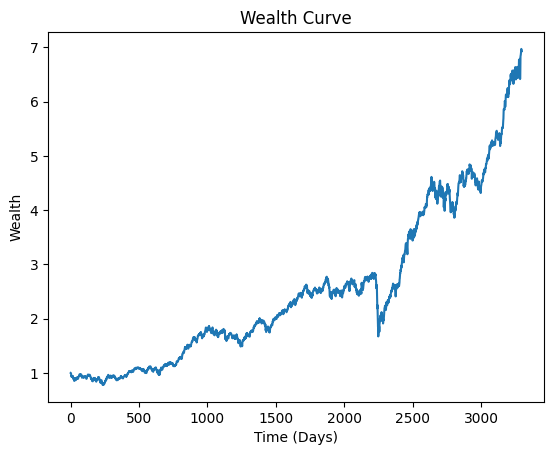

In [18]:
# Parameters
T_train = 250  # Training window size (in days)
T_test = 21    # Testing window size (in days)
p = 46         # Number of assets

X = log_return_matrix_np  # Matrix of log returns (n x p)
y = nifty50_log_returns_vector  # Benchmark returns vector (length n)

N = len(X)  # Total number of days in the dataset

# Initialize wealth curve
wealth_curve = [1]

# Here, I use w_current as w_i+1,j (desired weights after rebalancing)
w_before_rebalancing = np.ones(p) / p  # Initialize uniformly
w_current = np.ones(p) / p  # Initial weights

# Iterating over the moving window
for i in range(0, N - T_train - T_test, T_test):
    # Testing window
    X_test = X[i + T_train:i + T_train + T_test]
    y_test = y[i + T_train:i + T_train + T_test]

    # Calculating out-of-sample returns (r_t^os)
    r_os = np.zeros(T_test)
    for t in range(T_test):
        r_os[t] = np.sum(w_current * X_test[t])

    # Update wealth curve based on the returns in the testing period
    for return_val in r_os:
        current_wealth = wealth_curve[-1]
        new_wealth = current_wealth * (1 + return_val)
        wealth_curve.append(new_wealth)

    # --- Turnover calculation ---
    turnover = np.sum(np.abs(w_current - w_before_rebalancing))

    # Updating the previous weights for the next iteration
    w_before_rebalancing = w_current.copy()

    # Printing the wealth curve
    # print(f"Window {i//T_test + 1}: Wealth Curve = {wealth_curve}")


# Plot the wealth curve
import matplotlib.pyplot as plt

plt.plot(wealth_curve)
plt.title("Wealth Curve")
plt.xlabel("Time (Days)")
plt.ylabel("Wealth")
plt.show()

<ipython-input-11-8de7c7861603>:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  daily_return = nifty50['Adj Close'][i] / nifty50['Adj Close'][i - 1] - 1


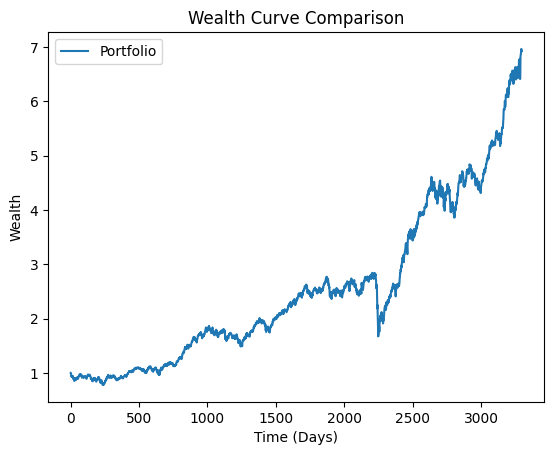

In [ ]:
# Parameters
T_train = 250  # Training window size (in days)
T_test = 21    # Testing window size (in days)
p = 46         # Number of assets

X = log_return_matrix_np  # Matrix of log returns (n x p)
y = nifty50_log_returns_vector  # Benchmark returns vector (length n)

N = len(X)  # Total number of days in the dataset

# Initialize wealth curve for portfolio and benchmark
wealth_curve_portfolio = [1]


# Here, I am using w_current as w_i+1,j (desired weights after rebalancing)
w_before_rebalancing = np.ones(p) / p  # Initializing uniformly
w_current = np.ones(p) / p  # Initial weights

# Iterating over the moving window
for i in range(0, N - T_train - T_test, T_test):
    # Testing window
    X_test = X[i + T_train:i + T_train + T_test]
    y_test = y[i + T_train:i + T_train + T_test]

    # Calculating out-of-sample returns (r_t^os) for portfolio
    r_os_portfolio = np.zeros(T_test)
    for t in range(T_test):
        r_os_portfolio[t] = np.sum(w_current * X_test[t])

    # Updating wealth curve for portfolio
    for return_val in r_os_portfolio:
        current_wealth = wealth_curve_portfolio[-1]
        new_wealth = current_wealth * (1 + return_val)
        wealth_curve_portfolio.append(new_wealth)

    # Updating wealth curve for Nifty 50 (benchmark)

    # --- Turnover calculation ---
    turnover = np.sum(np.abs(w_current - w_before_rebalancing))

    # Updating the previous weights for the next iteration
    w_before_rebalancing = w_current.copy()

initial_investment = 1
wealth_over_time = [initial_investment]

for i in range(1, len(nifty50)):
  daily_return = nifty50['Adj Close'][i] / nifty50['Adj Close'][i - 1] - 1
  wealth_over_time.append(wealth_over_time[-1] * (1 + daily_return))

# Plot the wealth curves

plt.plot(wealth_curve_portfolio, label="Portfolio")
plt.title("Wealth Curve Comparison")
plt.xlabel("Time (Days)")
plt.ylabel("Wealth")
plt.legend()
plt.show()

In [5]:
import numpy as np

# Initializing problem parameters
  # Number of features
X = log_return_matrix_np  # Matrix of log returns (n x p)
y = nifty50_log_returns_vector  # Target vector (length n)
print(f"this is the log returns nifty 50 vector:", y)
p= 46
lambda_1 = 1e-6
lambda_2 = 2e-3
lambda_c = 0.000001
tol = 0.0001
max_iter = 1000

# Initialize weights
w_before_rebalancing=np.ones(p)/p
w_current = np.ones(p) / p  # Initial weights (w_0)
w_previous = w_current   # Copy of the initial weights for comparison
print(f"w_0 at 1st iteratiom",w_current)
print(f"w previous",w_previous)
# Precomputing cj = sum(X_ij^2) for each j
cj = np.sum(X**2, axis=0)
print(f"c_j vector",cj)
v_hat = beta_initial**(-1)
print(f"v hat vector",v_hat)
min_estimate_for_gamma_0 = np.max((v_hat) * (lambda_1) + lambda_c)
print(f"min estimate for gamma0",min_estimate_for_gamma_0)
# Initial gamma_0
gamma_0_current = 115
gamma_0_previous = gamma_0_current  # This stores gamma_0^{(m-1)} initially
# gamma_0_mth_iteration=
# gamma_0_prev_iteration=
# for m in range(max_iter):
for j in range(p):
    less_than_sum = np.sum(X[:, :j] * w_current[:j],axis=1)
    print(f"less than sum ", less_than_sum)
    greater_than_sum = np.sum(X[:, j + 1:] * w_previous[j + 1:],axis=1)
    print(f"greater than sum", greater_than_sum)
    d_j = np.sum(X[:, j] * (y[:,0] - less_than_sum - greater_than_sum))
    print(f"d_j^(m) for j={j}:", d_j)
    num_j = d_j + gamma_0_previous - v_hat[j] * lambda_1  # Use gamma_0_prev here
    print(f"num for j={j}:", num_j)
    denom_j = cj[j] + 2 * lambda_2
    print(f"denom for j={j}:", denom_j)
    w_candidate_lower = (num_j - lambda_c) / denom_j
    print(f"w_candidate_lower for j={j}:", w_candidate_lower)
    w_candidate_upper = (num_j + lambda_c) / denom_j
    print(f"w_candidate_upper for j={j}:", w_candidate_upper)

    if w_candidate_lower > w_before_rebalancing[j]:
        w_previous[j]=w_current[j]
        w_current[j] = w_candidate_lower
    elif w_candidate_lower <= w_previous[j] <= w_candidate_upper:
        w_previous[j]=w_current[j]
        w_current[j] = w_before_rebalancing
    elif 0<=w_candidate_upper<=w_previous[j]:
        w_previous[j]=w_current[j]
        w_current[j]=w_candidate_upper
    else:
        w_previous[j]=w_current[j]
        w_current[j]=0

print(f"w_current",w_current)
print(f"w_previous",w_previous)
S_u=np.where((w_current>w_previous)&(w_previous>=0))[0]
print(S_u)
S_m=np.where(w_current==w_previous)[0]
print(S_m)
S_l=np.where((w_current>0)&(w_current<w_previous))[0]
print(S_l)
denominator_gamma_term = np.sum(1 / (cj[S_u] + 2 * lambda_2)) + np.sum(1 / (cj[S_l] + 2 * lambda_2))


this is the log returns nifty 50 vector: [[ 0.0086964 ]
 [ 0.00073864]
 [-0.00354669]
 ...
 [ 0.00619879]
 [ 0.00733408]
 [-0.0014109 ]]
w_0 at 1st iteratiom [0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913]
w previous [0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.0

<ipython-input-17-8abe243d71ae>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  daily_return = nifty50['Adj Close'][i] / nifty50['Adj Close'][i - 1] - 1


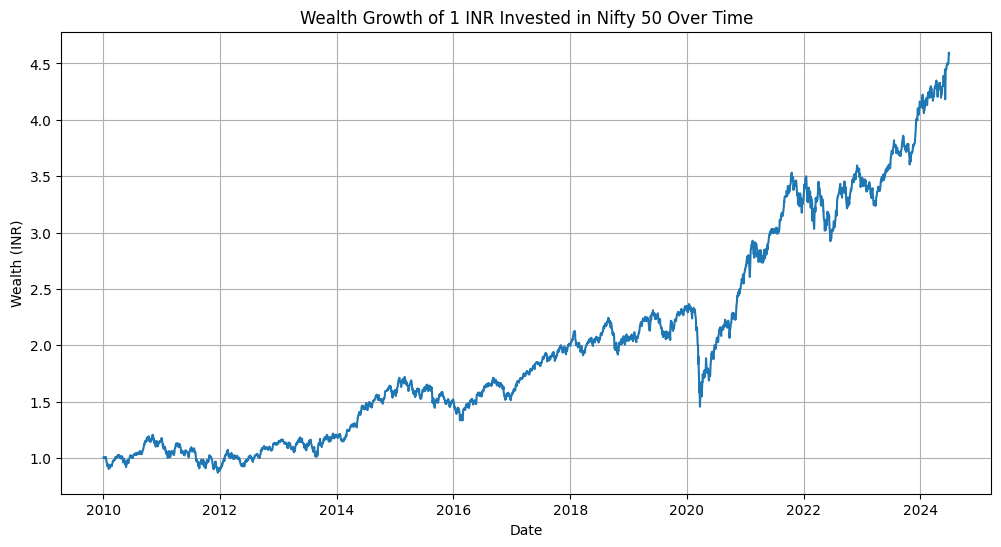

In [17]:
import matplotlib.pyplot as plt

initial_investment = 1
wealth_over_time = [initial_investment]

for i in range(1, len(nifty50)):
  daily_return = nifty50['Adj Close'][i] / nifty50['Adj Close'][i - 1] - 1
  wealth_over_time.append(wealth_over_time[-1] * (1 + daily_return))

# Plotting the wealth graph
plt.figure(figsize=(12, 6))
plt.plot(nifty50.index, wealth_over_time)
plt.xlabel('Date')
plt.ylabel('Wealth (INR)')
plt.title('Wealth Growth of 1 INR Invested in Nifty 50 Over Time')
plt.grid(True)
plt.show()

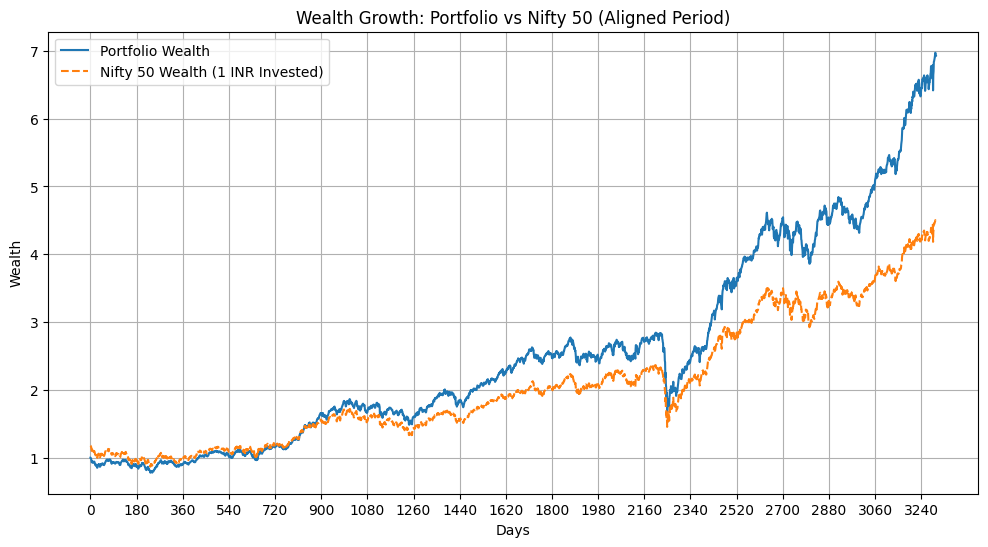

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Parameters for moving window portfolio-based wealth curve
T_train = 250  # Training window size (in days)
T_test = 21    # Testing window size (in days)
p = 46         # Number of assets

X = log_return_matrix_np  # Matrix of log returns (n x p)
y = nifty50_log_returns_vector  # Benchmark returns vector (length n)

N = len(X)  # Total number of days in the dataset

# Initializing portfolio wealth curve
portfolio_wealth_curve = [1]

# Initializing weights
w_before_rebalancing = np.ones(p) / p  # Initial uniform weights
w_current = np.ones(p) / p  # Initial portfolio weights

# Iterating over the moving window for the portfolio-based wealth curve
for i in range(0, N - T_train - T_test, T_test):
    # Testing window
    X_test = X[i + T_train:i + T_train + T_test]
    y_test = y[i + T_train:i + T_train + T_test]

    # Calculating out-of-sample returns (r_t^os)
    r_os = np.zeros(T_test)
    for t in range(T_test):
        r_os[t] = np.sum(w_current * X_test[t])

    # Updating portfolio wealth curve based on the returns in the testing period
    for return_val in r_os:
        current_wealth = portfolio_wealth_curve[-1]
        new_wealth = current_wealth * (1 + return_val)
        portfolio_wealth_curve.append(new_wealth)

    # --- Turnover calculation ---
    turnover = np.sum(np.abs(w_current - w_before_rebalancing))

    # Updating the previous weights for the next iteration
    w_before_rebalancing = w_current.copy()

# Initializing for index-based wealth curve (Nifty 50)
initial_investment = 1
nifty50_wealth_over_time = [initial_investment]

# Calculating the wealth curve for Nifty 50 based on 'Adj Close' values
for i in range(1, len(nifty50)):
    daily_return = nifty50['Adj Close'].iloc[i] / nifty50['Adj Close'].iloc[i - 1] - 1
    nifty50_wealth_over_time.append(nifty50_wealth_over_time[-1] * (1 + daily_return))

# Adjusting Nifty 50 curve by removing the first 250 days and the last 6 days
nifty50_wealth_over_time = nifty50_wealth_over_time[T_train:-6]

# Ensuring both curves have the same length by slicing to the shorter one if necessary
min_len = min(len(portfolio_wealth_curve), len(nifty50_wealth_over_time))
portfolio_wealth_curve = portfolio_wealth_curve[:min_len]
nifty50_wealth_over_time = nifty50_wealth_over_time[:min_len]

assert len(portfolio_wealth_curve) == len(nifty50_wealth_over_time), "Portfolio and index wealth curves must have the same length"

# Generating custom x-tick labels for days (January and July equivalents)
x_tick_indices = np.arange(0, len(portfolio_wealth_curve), 180)  # Every 180 days (approx. 6 months)
x_tick_labels = [str(i) for i in x_tick_indices]  # Converting indices to string for labeling

# Plotting both wealth curves
plt.figure(figsize=(12, 6))

# Plotting portfolio-based wealth curve
plt.plot(range(len(portfolio_wealth_curve)), portfolio_wealth_curve, label='Portfolio Wealth')

# Plotting Nifty 50-based wealth curve
plt.plot(range(len(nifty50_wealth_over_time)), nifty50_wealth_over_time, label='Nifty 50 Wealth (1 INR Invested)', linestyle='--')

# Add custom x-ticks for day count
plt.xticks(x_tick_indices, x_tick_labels)

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Wealth')
plt.title('Wealth Growth: Portfolio vs Nifty 50 (Aligned Period)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [10]:
import numpy as np

# Step 1: Calculate daily log returns from the wealth curves
portfolio_returns = np.diff(np.log(portfolio_wealth_curve))
nifty50_returns = np.diff(np.log(nifty50_wealth_over_time))

# --- Function to calculate Market Drawdown and Duration ---
def calculate_drawdown_and_duration(wealth_curve):
    wealth_curve = np.array(wealth_curve)
    peak = np.maximum.accumulate(wealth_curve)
    drawdown = (wealth_curve - peak) / peak
    max_drawdown = drawdown.min()

    # Calculating drawdown duration
    duration = 0
    max_duration = 0
    for i in range(1, len(wealth_curve)):
        if wealth_curve[i] < peak[i]:  # Still in drawdown
            duration += 1
        else:  # Drawdown ends when wealth reaches a new peak
            if duration > max_duration:
                max_duration = duration
            duration = 0
    return max_drawdown, max_duration

# --- Function to calculate Alpha score ---
def calculate_alpha(portfolio_returns, nifty50_returns, risk_free_rate=0.03):
    # Calculate beta (slope of regression line)
    covariance_matrix = np.cov(portfolio_returns, nifty50_returns)
    beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]

    # Mean returns for the portfolio and the benchmark (Nifty 50)
    portfolio_mean = np.mean(portfolio_returns)
    nifty50_mean = np.mean(nifty50_returns)

    # Alpha calculation using CAPM formula
    alpha = portfolio_mean - (risk_free_rate + beta * (nifty50_mean - risk_free_rate))
    return alpha

# --- Function to calculate Correlation ---
def calculate_correlation(portfolio_returns, nifty50_returns):
    return np.corrcoef(portfolio_returns, nifty50_returns)[0, 1]

# --- Function to calculate Sharpe Ratio ---
def calculate_sharpe_ratio(portfolio_returns, risk_free_rate=0.03):
    excess_returns = portfolio_returns - risk_free_rate
    return np.mean(excess_returns) / np.std(excess_returns)

# Step 2: Calculate the metrics

# 1. Market Drawdown and Drawdown Duration
max_drawdown, max_drawdown_duration = calculate_drawdown_and_duration(portfolio_wealth_curve)
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Max Drawdown Duration: {max_drawdown_duration} days")

# 2. Alpha Score
alpha = calculate_alpha(portfolio_returns, nifty50_returns)
print(f"Alpha: {alpha:.4f}")

# 3. Correlation
correlation = calculate_correlation(portfolio_returns, nifty50_returns)
print(f"Correlation with Nifty 50: {correlation:.4f}")

# 4. Sharpe Ratio
sharpe_ratio = calculate_sharpe_ratio(portfolio_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Max Drawdown: -41.19%
Max Drawdown Duration: 421 days
Alpha: -0.0012
Correlation with Nifty 50: 0.9558
Sharpe Ratio: -2.7510


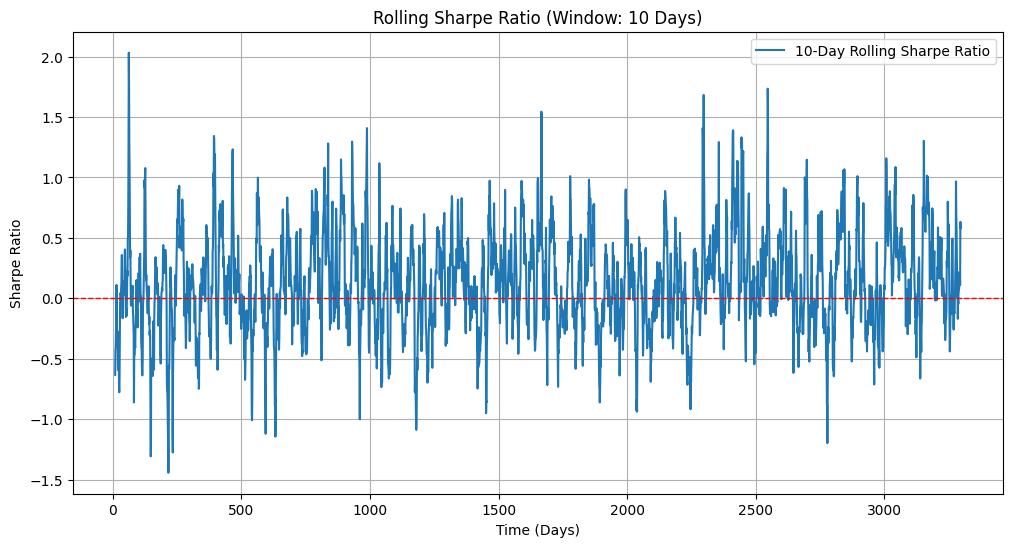

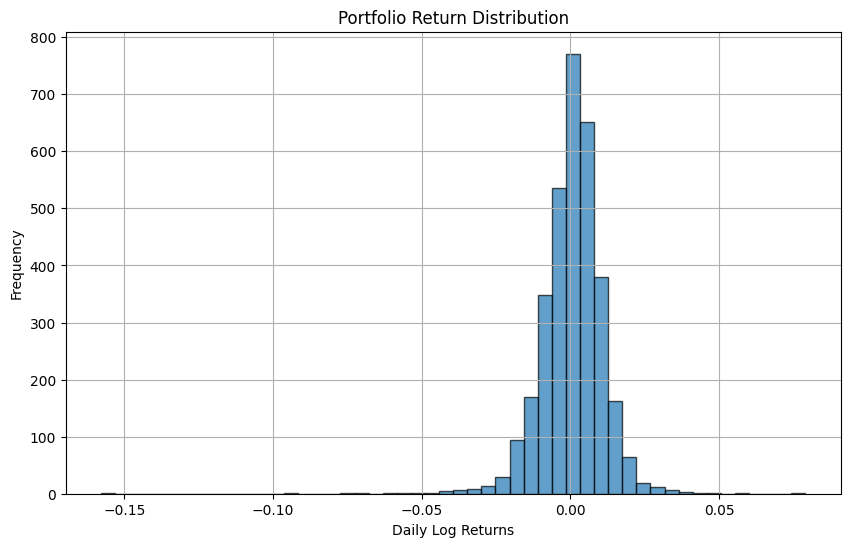

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Calculating daily log returns from the wealth curve
portfolio_returns = np.diff(np.log(portfolio_wealth_curve))

# Parameters
window_size = 10  # Rolling window size (e.g., 252 days for one year)
risk_free_rate = 0.0001 / 10 # Annual risk-free rate adjusted for daily returns

# --- Rolling Sharpe Ratio Calculation ---
def rolling_sharpe_ratio(returns, window_size, risk_free_rate):
    rolling_mean = pd.Series(returns).rolling(window=window_size).mean()
    rolling_std = pd.Series(returns).rolling(window=window_size).std()
    rolling_sharpe = (rolling_mean - risk_free_rate) / rolling_std
    return rolling_sharpe

# Calculate the rolling Sharpe Ratio
rolling_sharpe = rolling_sharpe_ratio(portfolio_returns, window_size, risk_free_rate)

# --- Return Distribution (Histogram) ---
def plot_return_distribution(returns):
    plt.figure(figsize=(10, 6))
    plt.hist(returns, bins=50, edgecolor='k', alpha=0.7)
    plt.title('Portfolio Return Distribution')
    plt.xlabel('Daily Log Returns')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# --- Plot Rolling Sharpe Ratio ---
def plot_rolling_sharpe(rolling_sharpe):
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_sharpe, label=f'{window_size}-Day Rolling Sharpe Ratio')
    plt.axhline(0, color='r', linestyle='--', linewidth=1)
    plt.title(f'Rolling Sharpe Ratio (Window: {window_size} Days)')
    plt.xlabel('Time (Days)')
    plt.ylabel('Sharpe Ratio')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 2: Plot the results
# 1. Rolling Sharpe Ratio
plot_rolling_sharpe(rolling_sharpe)

# 2. Return Distribution
plot_return_distribution(portfolio_returns)


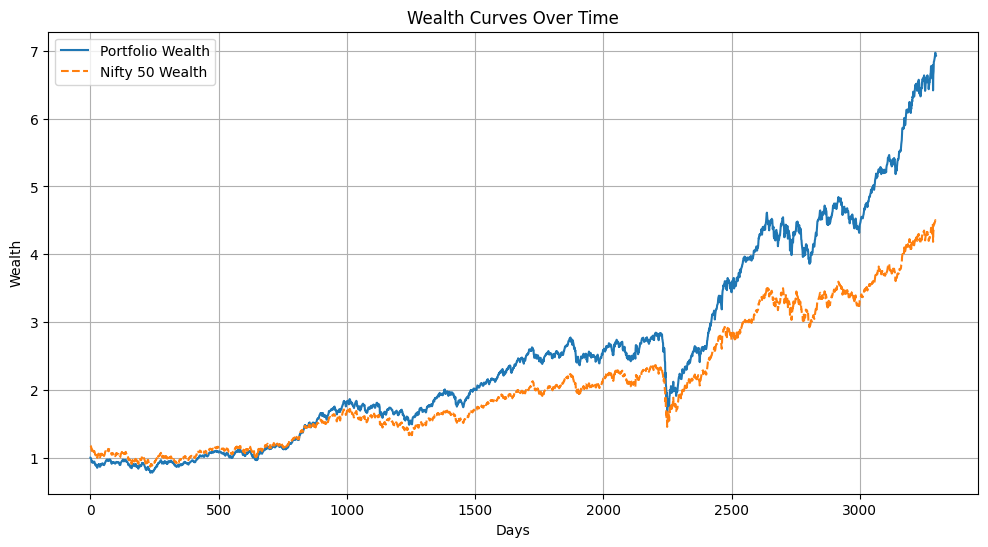

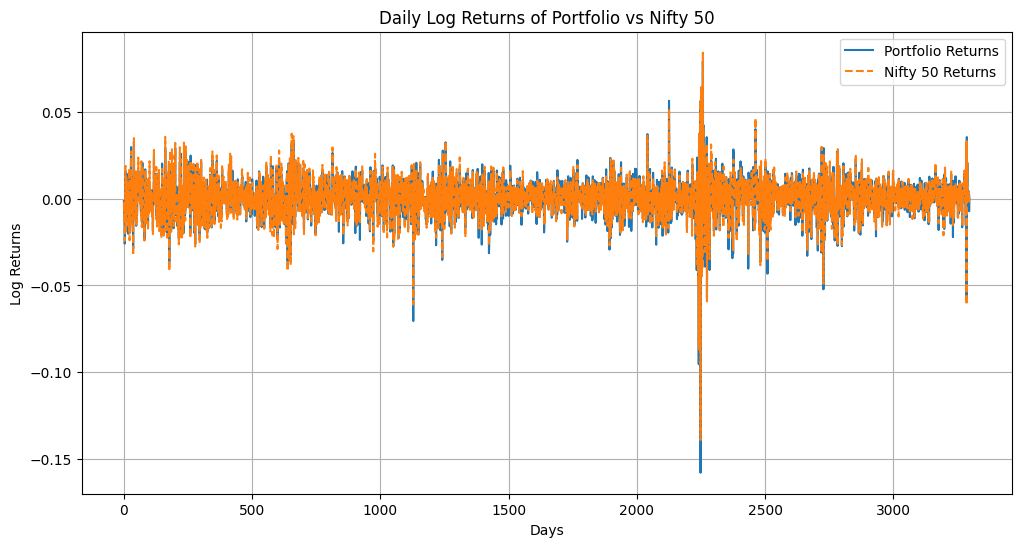

Portfolio Mean Return: 0.0005868815782333648, Portfolio Std Dev: 0.010691846947447566
Nifty 50 Mean Return: 0.0004070853264508711, Nifty 50 Std Dev: 0.010735713786045677
Sharpe Ratio: 0.04375614068226354


In [12]:
# Check portfolio performance over time
plt.figure(figsize=(12, 6))
plt.plot(portfolio_wealth_curve, label='Portfolio Wealth')
plt.plot(nifty50_wealth_over_time, label='Nifty 50 Wealth', linestyle='--')
plt.title('Wealth Curves Over Time')
plt.xlabel('Days')
plt.ylabel('Wealth')
plt.legend()
plt.grid(True)
plt.show()

# Compare portfolio returns with index
portfolio_returns = np.diff(np.log(portfolio_wealth_curve))
nifty50_returns = np.diff(np.log(nifty50_wealth_over_time))

plt.figure(figsize=(12, 6))
plt.plot(portfolio_returns, label='Portfolio Returns')
plt.plot(nifty50_returns, label='Nifty 50 Returns', linestyle='--')
plt.title('Daily Log Returns of Portfolio vs Nifty 50')
plt.xlabel('Days')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True)
plt.show()

# Calculate statistics of returns
portfolio_std = np.std(portfolio_returns)
nifty50_std = np.std(nifty50_returns)
portfolio_mean_return = np.mean(portfolio_returns)
nifty50_mean_return = np.mean(nifty50_returns)

print(f"Portfolio Mean Return: {portfolio_mean_return}, Portfolio Std Dev: {portfolio_std}")
print(f"Nifty 50 Mean Return: {nifty50_mean_return}, Nifty 50 Std Dev: {nifty50_std}")

# Calculate Sharpe Ratio manually
risk_free_rate = 0.03 / 252  # Adjusted for daily returns, you can change this
portfolio_sharpe = (portfolio_mean_return - risk_free_rate) / portfolio_std
print(f"Sharpe Ratio: {portfolio_sharpe}")
